In [1]:
import pandas as pd

In [55]:
mnist = pd.read_csv('mnist_test.csv')

labels = mnist['label']
features = mnist.drop(columns=['label'])

In [56]:
features /= 255.0  # Normalize pixel values to [0, 1]

In [57]:
mnist = pd.merge(features, labels, left_index=True, right_index=True)

In [60]:
mnist.to_csv('mnist_mapped2.csv', index=False)

In [7]:
features

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2)

#Convert to Pytorch tensors
X_train = torch.tensor(X_train.values, dtype=torch.float32)
X_test = torch.tensor(X_test.values, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.long)
y_test = torch.tensor(y_test.values, dtype=torch.long)

In [9]:
train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
train_loader= torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=False)

In [10]:
class MNISTNet(nn.Module):
    def __init__(self):
        super(MNISTNet, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
model = MNISTNet()

In [11]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [20]:
epochs = 3
correct = 0
total = 0
loss_list = []
accuracy_list = []

for epoch in range(epochs):
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        # Access weights (example: first layer)
        weights = model.fc1.weight.detach().cpu().numpy()
        biases  = model.fc1.bias.detach().cpu().numpy()
        print(weights, biases)


        # Here you can call your draw function:
        # draw_weights(weights)

        if output is not None:
            _, predicted = torch.max(output.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()
            accuracy = 100 * correct / total
            accuracy_list.append(accuracy)
        loss_list.append(loss.item())

        if batch_idx % 100 == 0:
            print(f"Epoch {epoch} Batch {batch_idx} Loss: {loss.item():.4f}")

[[-4.0940940e-06  1.1173822e-02  9.2174895e-03 ... -3.8407333e-03
   9.5788725e-03  2.7065750e-02]
 [ 2.6434693e-02  1.4264006e-02  2.7702276e-02 ...  8.1523508e-04
   3.7886873e-03 -9.7353421e-03]
 [-8.9511704e-03  2.5830828e-02  1.1510089e-02 ... -3.9387494e-05
   5.8088116e-03 -3.4360606e-02]
 ...
 [ 3.2931816e-02  2.8912794e-02  5.0658062e-03 ...  2.6275817e-02
  -1.2361387e-02  3.0566189e-02]
 [ 3.4746420e-02 -4.9312152e-03 -9.0322550e-03 ...  3.1330075e-02
   3.4444537e-02  1.4190748e-04]
 [ 2.9637318e-02  2.0005107e-03 -3.5449706e-02 ...  2.6386578e-02
  -3.1149469e-02  1.8695924e-02]] [-0.04298383  0.04040032 -0.00259764  0.08493942  0.08234111 -0.03327201
 -0.02779995  0.06715102  0.0610986   0.00910013  0.05508751 -0.02151859
 -0.00201844 -0.02431808  0.02924206  0.01322552  0.04476149 -0.04572007
  0.05955599 -0.0133451  -0.01625868  0.05597156  0.08956193  0.02579196
  0.04219718  0.01507552  0.03770104 -0.01518909  0.07454305  0.03467378
  0.01348672  0.01170096  0.0776157

6


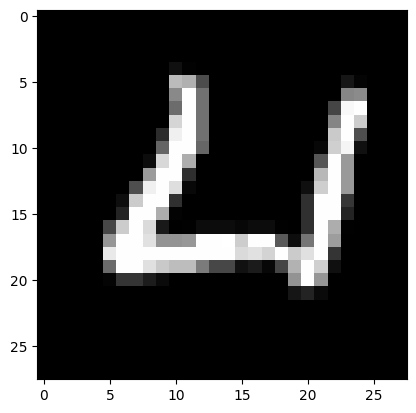

In [15]:
import matplotlib.pyplot as plt
i = 3
plt.imshow(X_train[i].reshape(28, 28), cmap='gray')

output = model(X_train[i].unsqueeze(0)).detach().cpu().numpy()[0].tolist()
print(output.index(max(output)))


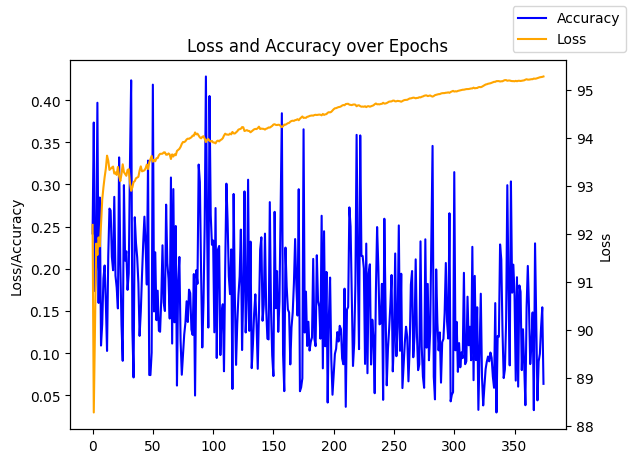

In [29]:

fig, ax = plt.subplots()
ax.plot(loss_list, label='Accuracy', color = "blue")
ax.set_ylabel('Loss/Accuracy')

ax2 = ax.twinx()
ax2.plot(accuracy_list, label='Loss', color='orange')
ax2.set_ylabel('Loss')
plt.title('Loss and Accuracy over Epochs')
fig.legend()
plt.show()

In [42]:
predictions = model(X_test)
predictions = torch.argmax(predictions, dim=1)


In [43]:
predictions

tensor([7, 1, 1,  ..., 3, 3, 0])

In [44]:
y_test

tensor([7, 1, 1,  ..., 3, 3, 0])

In [45]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 93.10%
